In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

In [24]:
train_image_dir = '../input/UBC-OCEAN/train_images'
test_image_dir = '../input/UBC-OCEAN/test_images'

# Loading training data...

In [25]:
train_data = pd.read_csv('../input/UBC-OCEAN/train.csv')

Only use five pre-defined classes for training

In [26]:
labels = ['CC', 'EC', 'HGSC', 'LGSC', 'MC']
train_data = train_data[train_data['label'].isin(labels)]

In [27]:
train_data['full_path'] = train_data['image_id'].apply(lambda x: os.path.join(train_image_dir, str(x) + '.png'))
train_data

,image_id,label,image_width,image_height,is_tma,full_path
0,4,HGSC,23785,20008,False,../input/UBC-OCEAN/train_images/4.png
1,66,LGSC,48871,48195,False,../input/UBC-OCEAN/train_images/66.png
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,../input/UBC-OCEAN/train_images/281.png
4,286,EC,37204,30020,False,../input/UBC-OCEAN/train_images/286.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,../input/UBC-OCEAN/train_images/65022.png
534,65094,MC,55042,45080,False,../input/UBC-OCEAN/train_images/65094.png
535,65300,HGSC,75860,27503,False,../input/UBC-OCEAN/train_images/65300.png
536,65371,HGSC,42551,41800,False,../input/UBC-OCEAN/train_images/65371.png


Since the 'train_thumbnails' folder contains smaller-sized images, we can use them for model processing. However, not all images in the training set are located in 'train_thumbnails,' so we need to identify the missing ones and process them accordingly.

In [28]:
thumbnails_folder_path = '../input/UBC-OCEAN/train_thumbnails'

train_files = [filename.split('.')[0] for filename in os.listdir(train_image_dir)]
thumbnails_files = [filename.replace('_thumbnail', '').split('.')[0] for filename in os.listdir(thumbnails_folder_path)]

Finding the Image IDs that are in train_files but not in thumbnails_files:

In [29]:
train_set = set(train_files)
thumbnails_set = set(thumbnails_files)


missing_image_ids = train_set - thumbnails_set
missing_image_ids_list = list(missing_image_ids)

print("Image IDs in train_files but not in thumbnails_files:")
print(missing_image_ids_list)

Image IDs in train_files but not in thumbnails_files:
['50932', '31594', '41368', '8280', '9200', '17637', '36302', '35565', '36583', '37385', '13568', '42857', '44603', '4134', '48734', '29084', '61797', '91', '21020', '57696', '41586', '53655', '40864', '36783', '47035']


In [30]:
missing_image_ids_list = [int(image_id) for image_id in missing_image_ids_list]
filtered_train_data = train_data[train_data['image_id'].isin(missing_image_ids_list)]

filtered_train_data

,image_id,label,image_width,image_height,is_tma,full_path
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
37,4134,MC,2964,2964,True,../input/UBC-OCEAN/train_images/4134.png
76,8280,HGSC,2964,2964,True,../input/UBC-OCEAN/train_images/8280.png
83,9200,MC,3388,3388,True,../input/UBC-OCEAN/train_images/9200.png
112,13568,LGSC,2964,2964,True,../input/UBC-OCEAN/train_images/13568.png
149,17637,HGSC,2964,2964,True,../input/UBC-OCEAN/train_images/17637.png
176,21020,MC,3388,3388,True,../input/UBC-OCEAN/train_images/21020.png
236,29084,LGSC,3388,3388,True,../input/UBC-OCEAN/train_images/29084.png
263,31594,EC,3388,3388,True,../input/UBC-OCEAN/train_images/31594.png
288,35565,MC,2964,2964,True,../input/UBC-OCEAN/train_images/35565.png


Since all the missing images in thumbnails are TMA images that are small sized, we can use them from the train_images folder instead.

In [30]:
#creating full path column for each image in the train_data dataframe

train_data['full_path'] = ''
for index, row in train_data.iterrows():
    image_id = row['image_id']
    if image_id in missing_image_ids_list:
        train_data.at[index, 'full_path'] = os.path.join(train_image_dir, str(image_id) + '.png')
    else:
        train_data.at[index, 'full_path'] = os.path.join(thumbnails_folder_path, str(image_id) + '_thumbnail.png')

train_data

,image_id,label,image_width,image_height,is_tma,full_path
0,4,HGSC,23785,20008,False,../input/UBC-OCEAN/train_thumbnails/4_thumbnai...
1,66,LGSC,48871,48195,False,../input/UBC-OCEAN/train_thumbnails/66_thumbna...
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,../input/UBC-OCEAN/train_thumbnails/281_thumbn...
4,286,EC,37204,30020,False,../input/UBC-OCEAN/train_thumbnails/286_thumbn...
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,../input/UBC-OCEAN/train_thumbnails/65022_thum...
534,65094,MC,55042,45080,False,../input/UBC-OCEAN/train_thumbnails/65094_thum...
535,65300,HGSC,75860,27503,False,../input/UBC-OCEAN/train_thumbnails/65300_thum...
536,65371,HGSC,42551,41800,False,../input/UBC-OCEAN/train_thumbnails/65371_thum...


In [31]:
label_counts = train_data['label'].value_counts()
label_counts

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

As indicated above, the classes are very imbalanced.

# Data Preprocessing

Convert text labels to numerical labels

In [31]:
label_mapping = {'CC': 0, 'EC': 1, 'HGSC': 2, 'LGSC': 3, 'MC': 4}
train_data['numerical_label'] = train_data['label'].map(label_mapping)

Increase the number of images for each class by upsampling and perform data agumentation to create variation for the image data.

In [33]:
from sklearn.utils import resample

# Define the target number of samples for each class
target_samples = 222

# Resample each class to have the target number of samples
resampled_data = []
for label in train_data['numerical_label'].unique():
    class_data = train_data[train_data['numerical_label'] == label]
    resampled_class = resample(class_data, replace=True, n_samples=target_samples, random_state=42)
    resampled_data.append(resampled_class)

balanced_train_data = pd.concat(resampled_data)

# Resize images to 256x256
image_size = (512, 512)

x_balanced = np.empty(shape=(len(balanced_train_data), *image_size, 3), dtype=np.uint8)
y_balanced = np.empty(shape=len(balanced_train_data), dtype=np.uint8)

for index, full_path in enumerate(balanced_train_data['full_path']):
    image_array = Image.open(full_path).resize(image_size).convert('RGB')
    x_balanced[index] = np.array(image_array)
    y_balanced[index] = balanced_train_data.iloc[index]['numerical_label']

print(x_balanced.shape)
print(y_balanced.shape)

(1110, 512, 512, 3)
(1110,)


In [34]:
# Set target to one-hot target for classification problem
from sklearn.preprocessing import OneHotEncoder
y_targets_balanced = y_balanced.reshape(len(y_balanced), -1)
enc = OneHotEncoder()
enc.fit(y_targets_balanced)
y_balanced = enc.transform(y_targets_balanced).toarray()
print(y_balanced.shape)

(1110, 5)


In [35]:
from sklearn.model_selection import train_test_split

# Split the balanced data into 80% training and 20% validation
x_train, x_val, y_train, y_val  = train_test_split(
    x_balanced, y_balanced, test_size=0.2, random_state=1, stratify=y_balanced
)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((888, 512, 512, 3), (222, 512, 512, 3), (888, 5), (222, 5))

**Data Agumentation**

In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Modeling - RestNet50 Implementation

In [37]:
import keras.applications
print(dir( keras.applications))

['ConvNeXtBase', 'ConvNeXtLarge', 'ConvNeXtSmall', 'ConvNeXtTiny', 'ConvNeXtXLarge', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3', 'EfficientNetV2L', 'EfficientNetV2M', 'EfficientNetV2S', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'ResNetRS101', 'ResNetRS152', 'ResNetRS200', 'ResNetRS270', 'ResNetRS350', 'ResNetRS420', 'ResNetRS50', 'VGG16', 'VGG19', 'Xception', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'convnext', 'densenet', 'efficientnet', 'efficientnet_v2', 'imagenet_utils', 'inception_resnet_v2', 'inception_v3', 'mob

In [38]:
from keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, BatchNormalization, Activation, Flatten, Dropout
from keras.models import Model
from keras.regularizers import l1, l2, l1_l2

def identity_block(input_tensor, kernel_size, filters, stage, block, use_bias=True, train_bn=True):
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), use_bias=use_bias, name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x, training=train_bn)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', use_bias=use_bias, name=conv_name_base + '2b')(x)
    x = BatchNormalization(name=bn_name_base + '2b')(x, training=train_bn)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), use_bias=use_bias, name=conv_name_base + '2c')(x)
    x = BatchNormalization(name=bn_name_base + '2c')(x, training=train_bn)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2), use_bias=True, train_bn=True):
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides, use_bias=use_bias, name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x, training=train_bn)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', use_bias=use_bias, name=conv_name_base + '2b')(x)
    x = BatchNormalization(name=bn_name_base + '2b')(x, training=train_bn)
    x = Activation('relu')(x)
    x = Conv2D(filters3, (1, 1), use_bias=use_bias, name=conv_name_base + '2c')(x)
    x = BatchNormalization(name=bn_name_base + '2c')(x, training=train_bn)

    shortcut = Conv2D(filters3, (1, 1), strides=strides, use_bias=use_bias, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(name=bn_name_base + '1')(shortcut, training=train_bn)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

def ResNet50(input_shape=(512, 512, 3), classes=5):
    img_input = Input(shape=input_shape)
    x = ZeroPadding2D((3, 3))(img_input)
    
    x = Conv2D(64, (7, 7), strides=(2, 2), use_bias=True, name='conv1')(x)
    x = BatchNormalization(name='bn_conv1')(x, training=True)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1), use_bias=True, train_bn=True)
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c', use_bias=True, train_bn=True)

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d', use_bias=True, train_bn=True)

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f', use_bias=True, train_bn=True)

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b', use_bias=True, train_bn=True)
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c', use_bias=True, train_bn=True)
    x = AveragePooling2D((7, 7), name='avg_pool')(x)
    
    x = Flatten()(x)
    x = Dense(classes, activation='softmax')(x)


    model = Model(img_input, x, name='resnet50')
    return model


In [39]:
model_final = ResNet50()

# Evaluation

In [40]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score

class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = np.argmax(self.model.predict(x_val), axis=1)
        val_targ = np.argmax(y_val, axis=1)

        val_f1 = f1_score(val_targ, val_predict, average='weighted', zero_division=1)
        val_recall = recall_score(val_targ, val_predict, average='weighted', zero_division=1)
        val_precision = precision_score(val_targ, val_predict, average='weighted', zero_division=1)

        self.val_f1s.append(val_f1)
        self.val_recalls.append(val_recall)
        self.val_precisions.append(val_precision)

        print(f' - val_f1: {val_f1:.4f} - val_precision: {val_precision:.4f} - val_recall: {val_recall:.4f}')

metrics1 = Metrics()

In [41]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Define other callbacks
weight_path = "best_weights.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=100)

In [42]:
from keras.optimizers import Adam


# Compile the model
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 200
batch_size = 8

history = model_final.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                          steps_per_epoch=len(x_train) / batch_size,
                          validation_data=(x_val, y_val),
                          epochs=epochs,
                          callbacks=[checkpoint, reduce_lr, early_stop, metrics1])

Epoch 1/200
111/111 [==============================] - ETA: 0s - loss: 2.9978 - accuracy: 0.2230
Epoch 1: val_loss improved from inf to 1.93423, saving model to best_weights.hdf5
7/7 [==============================] - 3s 272ms/step
 - val_f1: 0.1774 - val_precision: 0.3675 - val_recall: 0.2568
111/111 [==============================] - 94s 501ms/step - loss: 2.9978 - accuracy: 0.2230 - val_loss: 1.9342 - val_accuracy: 0.2568 - lr: 0.0010
Epoch 2/200
111/111 [==============================] - ETA: 0s - loss: 1.7887 - accuracy: 0.2624
Epoch 2: val_loss did not improve from 1.93423
7/7 [==============================] - 2s 271ms/step
 - val_f1: 0.2267 - val_precision: 0.4512 - val_recall: 0.2928
111/111 [==============================] - 53s 479ms/step - loss: 1.7887 - accuracy: 0.2624 - val_loss: 2.5664 - val_accuracy: 0.2928 - lr: 0.0010
Epoch 3/200
111/111 [==============================] - ETA: 0s - loss: 1.6719 - accuracy: 0.3029
Epoch 3: val_loss improved from 1.93423 to 1.49500, sa

In [43]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.8918918967247009
Validation Accuracy: 0.8648648858070374


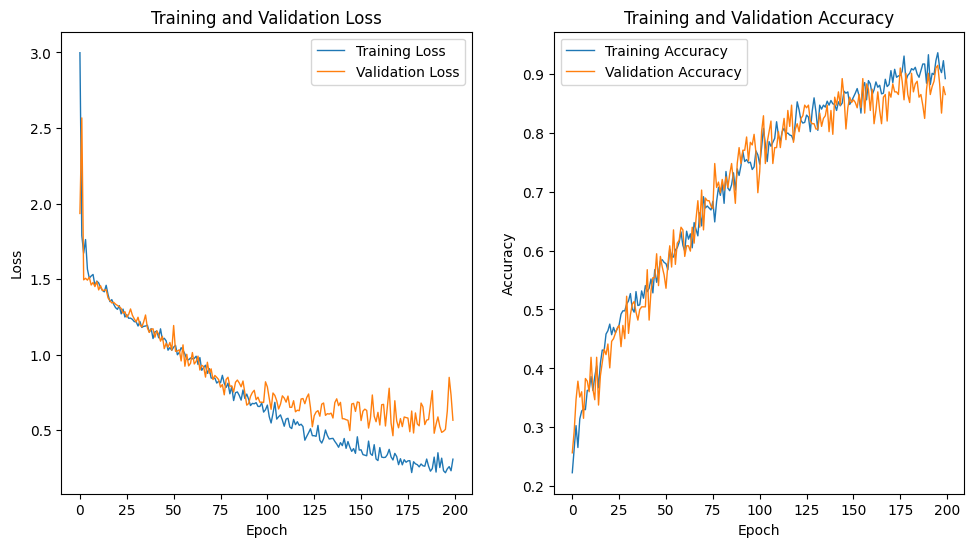

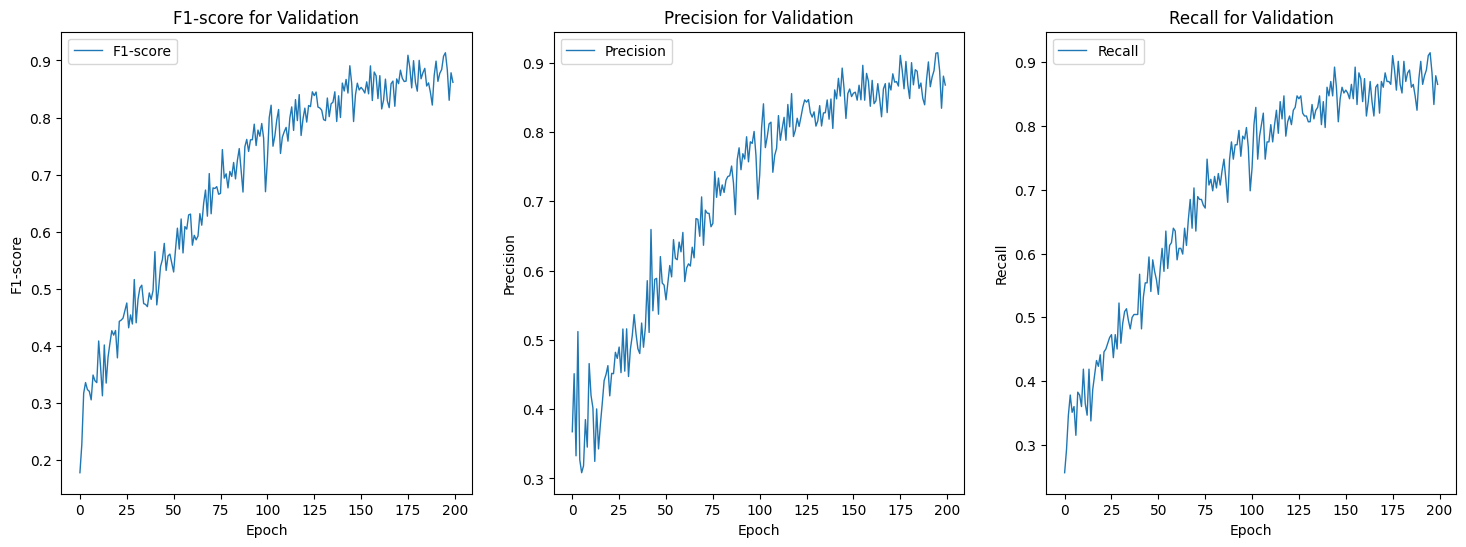

In [44]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(18, 6))

# Plot 1: Training and Validation Loss
plt.subplot(1, 3, 1)
plt.plot(training_loss, label='Training Loss', linewidth=1)
plt.plot(validation_loss, label='Validation Loss', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot 2: Training and Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(training_accuracy, label='Training Accuracy', linewidth=1)
plt.plot(validation_accuracy, label='Validation Accuracy', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Create a new figure for F1-score, Precision, and Recall
plt.figure(figsize=(18, 6))

# Plot 3: F1-score
plt.subplot(1, 3, 1)
plt.plot(metrics1.val_f1s, label='F1-score', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.title('F1-score for Validation')

# Plot 4: Precision
plt.subplot(1, 3, 2)
plt.plot(metrics1.val_precisions, label='Precision', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision for Validation')

# Plot 5: Recall
plt.subplot(1, 3, 3)
plt.plot(metrics1.val_recalls, label='Recall', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall for Validation')

# Show the plots
plt.show()


**Classification Report**

In [45]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(model_final.predict(x_val), axis=1)

# Generate the classification report
class_report = classification_report(y_true, y_pred)


print("\n Validation Classification Report:\n", class_report)

7/7 [==============================] - 2s 270ms/step

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.76      0.87      0.81        45
           2       0.88      0.68      0.77        44
           3       0.90      1.00      0.95        44
           4       0.90      0.98      0.94        45

    accuracy                           0.86       222
   macro avg       0.87      0.86      0.86       222
weighted avg       0.87      0.86      0.86       222



# Loading test data...

In [32]:
test_data = pd.read_csv('../input/UBC-OCEAN/test.csv')
test_data

,image_id,image_width,image_height
0,41,28469,16987


In [33]:
test_thumbnails_folder_path = '../input/UBC-OCEAN/test_thumbnails'
test_data['full_path'] = test_data['image_id'].apply(lambda x: os.path.join(test_thumbnails_folder_path, f"{x}_thumbnail.png"))

In [34]:
from PIL import Image
import numpy as np

x_test = np.empty(shape=(len(test_data), 512, 512, 3), dtype=np.uint8)

for index, full_path in enumerate(test_data['full_path']):
    image_array = Image.open(full_path).resize((512, 512)).convert('RGB')
    x_test[index] = image_array

print(x_test.shape)

(1, 512, 512, 3)


In [35]:
from keras.models import load_model


model_final.load_weights('/kaggle/working/best_weights.hdf5')
predictions = model_final.predict(x_test)

predictions

1/1 [==============================] - 0s 27ms/step


array([[0.01771711, 0.86374795, 0.02546911, 0.05356517, 0.03950058]],
      dtype=float32)

In [36]:
test_data['label'] = predictions.argmax(axis=1)  # Assuming one-hot encoding, get the index of the max value
submission_df = test_data[['image_id', 'label']]

**Submission file**

In [37]:
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Map numerical labels to actual labels
submission_df.loc[:, 'label'] = submission_df['label'].map(reverse_label_mapping)

submission_df

,image_id,label
0,41,EC


In [52]:
# Save to CSV
submission_df.to_csv('submission.csv', index=False)